1. https://stackoverflow.com/questions/50576426/microsoft-azure-cognitive-services-handwriting-detection-bounding-box-parameters

In [11]:
import json
import cv2
from pprint import pprint
import matplotlib.pyplot as plt
from helpers import draw_bounding_boxes, read_json

In [14]:
json_path = '/home/acer/Downloads/Sample-Veggi-Bill-Modified.json'
img_path = '/home/acer/Downloads/Sample-Veggi-Bill-Modified.jpg'


# json_path = '/home/acer/Downloads/Ratnadeep-Bill-Modified.json'
# img_path = '/home/acer/Downloads/Ratnadeep-Bill-Modified.jpg'

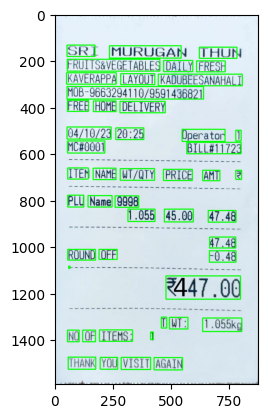

In [15]:
img = cv2.imread(img_path)
image = img.copy()
data = read_json(json_path)
bounding_boxes = draw_bounding_boxes(img, data, display=True, write=True, retrieve_boxes=True)

In [16]:
bounding_boxes

[[51, 133, 171, 182],
 [233, 136, 540, 189],
 [618, 142, 779, 190],
 [52, 194, 449, 245],
 [465, 199, 590, 247],
 [606, 201, 729, 248],
 [49, 252, 262, 301],
 [281, 256, 427, 303],
 [442, 258, 802, 308],
 [51, 311, 636, 365],
 [53, 370, 143, 418],
 [164, 373, 261, 419],
 [278, 375, 472, 424],
 [51, 485, 240, 537],
 [260, 489, 380, 539],
 [544, 495, 728, 547],
 [774, 499, 797, 545],
 [53, 545, 213, 597],
 [564, 551, 797, 600],
 [54, 661, 142, 709],
 [163, 662, 261, 711],
 [279, 664, 426, 714],
 [464, 667, 588, 715],
 [632, 671, 706, 716],
 [774, 671, 799, 710],
 [54, 778, 123, 829],
 [141, 780, 244, 829],
 [257, 781, 358, 830],
 [312, 838, 428, 891],
 [468, 838, 592, 893],
 [656, 844, 775, 894],
 [662, 958, 774, 1005],
 [54, 1011, 173, 1057],
 [188, 1011, 266, 1054],
 [661, 1017, 775, 1066],
 [58, 1083, 64, 1093],
 [475, 1125, 794, 1225],
 [455, 1302, 478, 1349],
 [490, 1303, 569, 1353],
 [632, 1306, 800, 1364],
 [53, 1358, 103, 1408],
 [118, 1358, 173, 1408],
 [190, 1357, 332, 1406],
 

In [17]:
import cv2
import numpy as np
# from skimage.feature import greycomatrix, greycoprops
from skimage.feature import graycomatrix, graycoprops
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


/home/acer/.virtualenvs/pytorch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


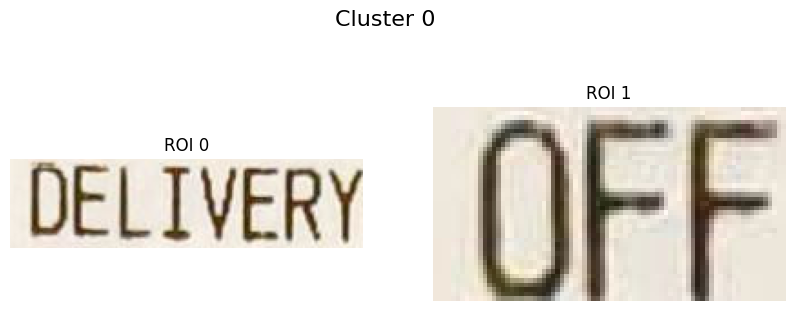

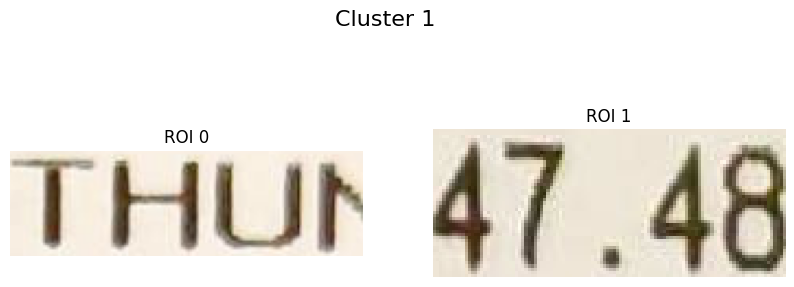

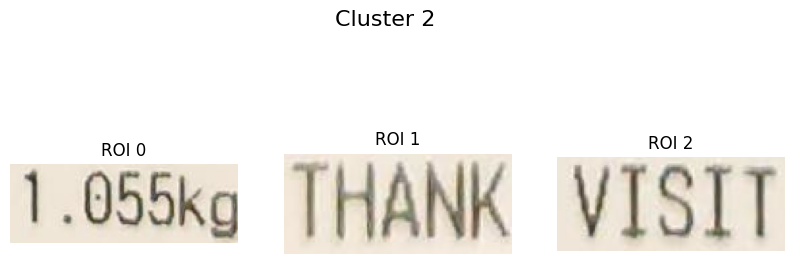

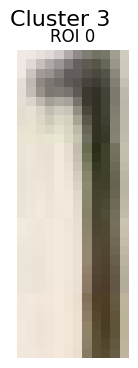

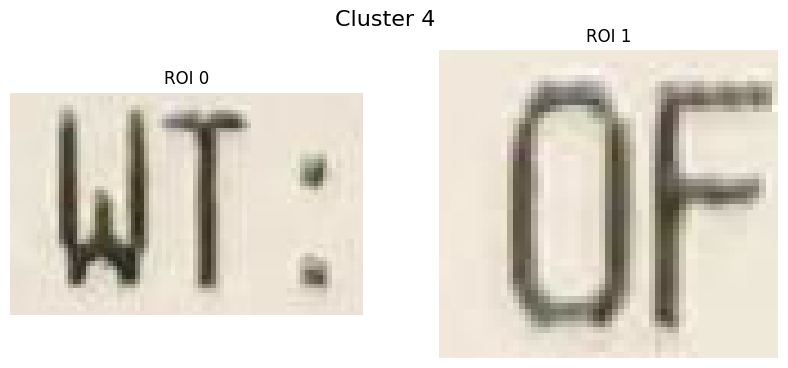

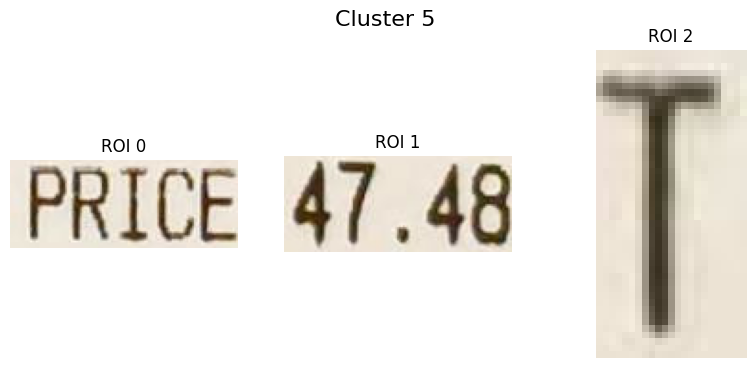

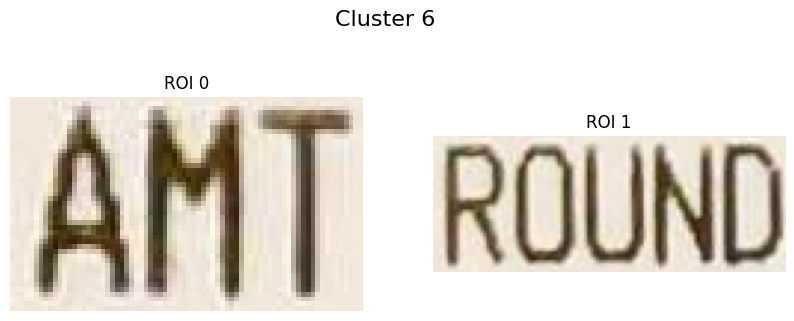

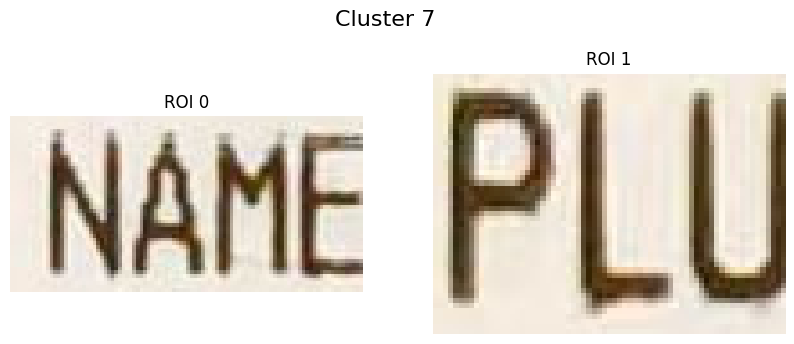

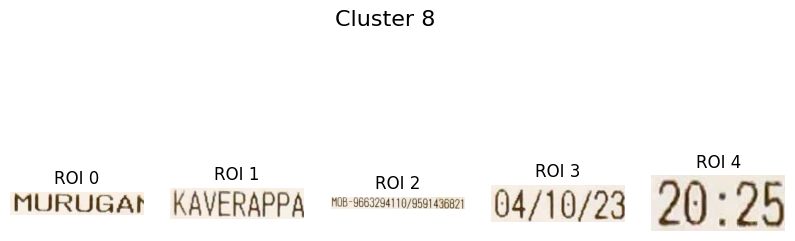

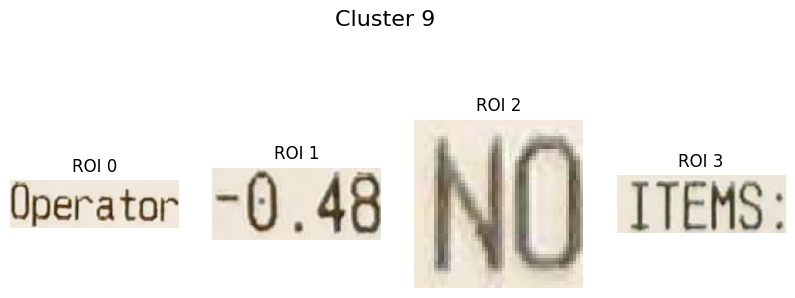

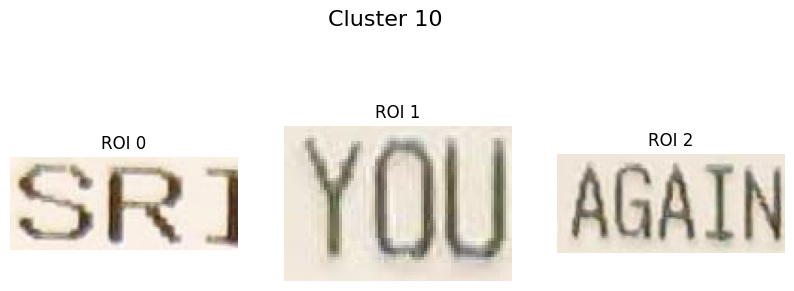

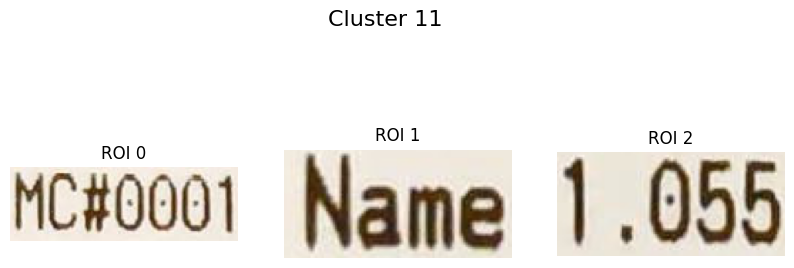

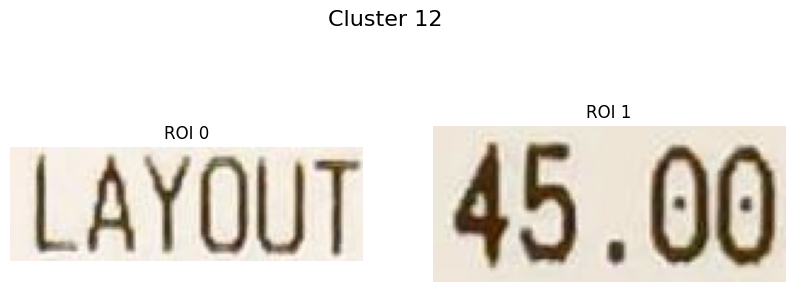

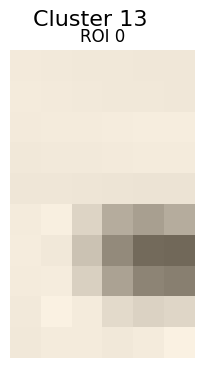

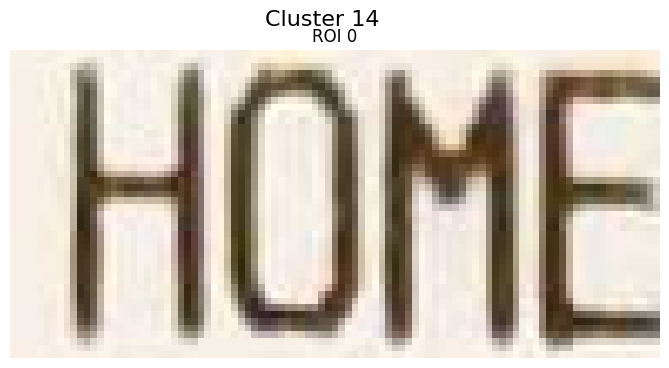

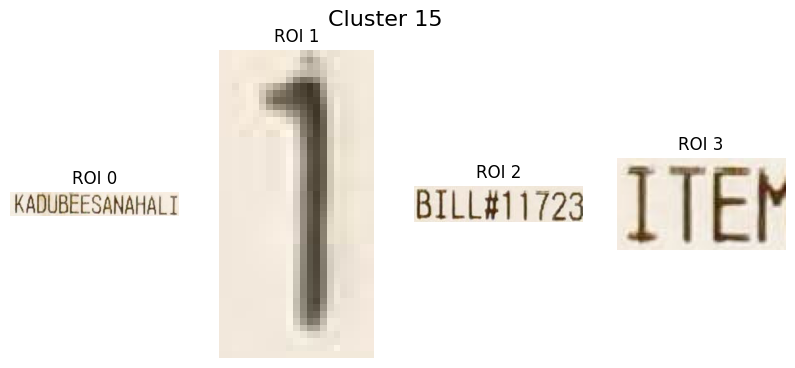

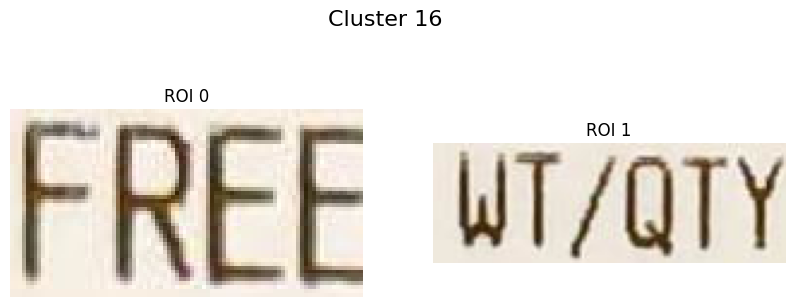

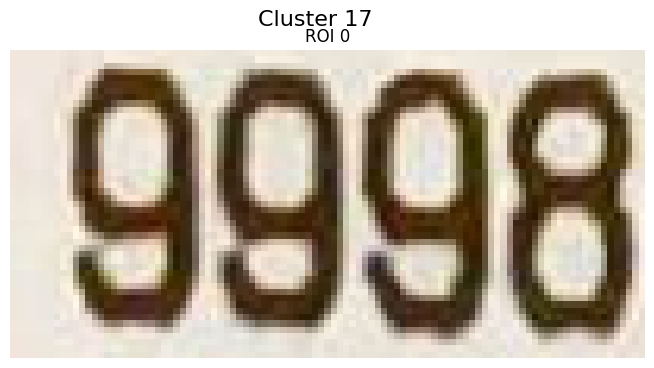

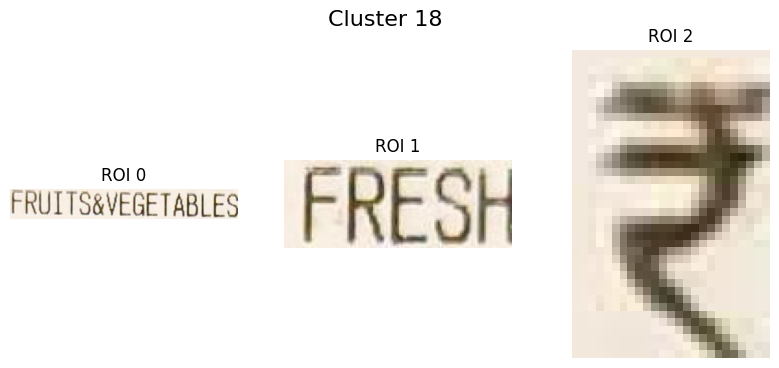

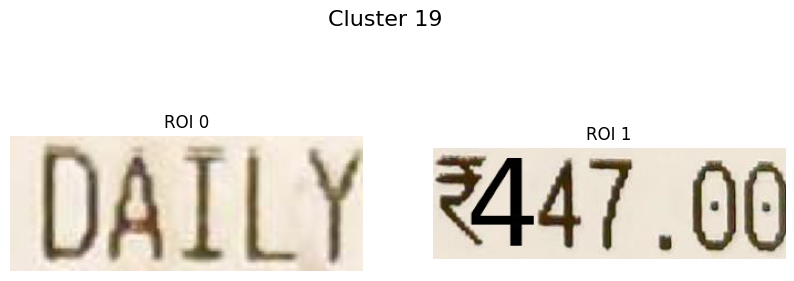

In [18]:
# Function to extract GLCM features from an image
def extract_glcm_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray_image, distances=[5], angles=[0], symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    return [contrast, energy, correlation, homogeneity]

# Crop ROIs, extract GLCM features, and store in a list
rois = []
glcm_features = []
for box in bounding_boxes:
    x, y, width, height = box
    x1, y1, x2, y2 = box
    roi = image[y1:y2, x1:x2]
    rois.append(roi)
    glcm_feature = extract_glcm_features(roi)
    glcm_features.append(glcm_feature)

# Perform clustering (e.g., K-Means) to find similar ROIs based on GLCM features
num_clusters = 20  # You can adjust this as needed
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(glcm_features)

# Group ROIs by their cluster labels
clustered_rois = [[] for _ in range(num_clusters)]
for i, roi in enumerate(rois):
    clustered_rois[cluster_labels[i]].append(roi)

# Plot the clustered ROIs
for cluster_id, cluster in enumerate(clustered_rois):
    plt.figure(figsize=(10, 4))
    plt.suptitle(f'Cluster {cluster_id}', fontsize=16)
    for i, roi in enumerate(cluster):
        plt.subplot(1, len(cluster), i + 1)
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'ROI {i}')
    plt.show()

In [19]:
glcm_features[0]

[4811.334516415262,
 0.07326775137314902,
 0.20663160826837276,
 0.19210617913216688]